In [1]:
import numpy as np #numerical work
import pandas as pd #dataframe
import matplotlib.pyplot as plt #graphs and charts
import scipy as sc #stats
import sklearn as sk #modelling
import seaborn as sns #graphing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.0 MB/s eta 0:00:00


In [4]:
df=pd.read_csv('dataset2.csv')
print(df)

     Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1        0  ...   
1            1       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
#first five rows
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


FILTERING + TRANSFORMATION

In [7]:
df.drop('Patient ID', axis=1, inplace=True)
print(df)

df.drop('Country', axis=1, inplace=True)
print(df)

df.drop('Continent', axis=1, inplace=True)
print(df)

df.drop('Hemisphere', axis=1, inplace=True)
print(df)

      Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0      67    Male          208         158/88          72         0   
1      21    Male          389         165/93          98         1   
2      21  Female          324         174/99          72         1   
3      84    Male          383        163/100          73         1   
4      66    Male          318          91/88          93         1   
...   ...     ...          ...            ...         ...       ...   
8758   60    Male          121          94/76          61         1   
8759   28  Female          120        157/102          73         1   
8760   47    Male          250         161/75         105         0   
8761   36    Male          178         119/67          60         1   
8762   25  Female          356         138/67          75         1   

      Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0                  0        1        0                    0  ...   
1          

In [8]:
# Split "Blood Pressure" into two separate columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

# Drop the original "Blood Pressure" column
df.drop(columns=['Blood Pressure'], inplace=True)

# Encode "Sex" variable
gender_mapping = {"Male": 0, "Female": 1}
df["Sex"] = df["Sex"].map(gender_mapping)

# Encode "Diet" variable
diet_mapping = {"Healthy": 0, "Average": 1, "Unhealthy": 2}
df["Diet"] = df["Diet"].map(diet_mapping)

# # Calculate correlation coefficients
# correlation = df.corr()["Heart Attack Risk"]

# # Display correlation coefficients
# print(correlation)


In [9]:
print(df)

      Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0      67    0          208          72         0               0        1   
1      21    0          389          98         1               1        1   
2      21    1          324          72         1               0        0   
3      84    0          383          73         1               1        1   
4      66    0          318          93         1               1        1   
...   ...  ...          ...         ...       ...             ...      ...   
8758   60    0          121          61         1               1        1   
8759   28    1          120          73         1               0        0   
8760   47    0          250         105         0               1        1   
8761   36    0          178          60         1               0        1   
8762   25    1          356          75         1               1        0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  ..

In [10]:
df.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
Systolic_BP                        0
Diastolic_BP                       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

EXPLORING

Target Variable

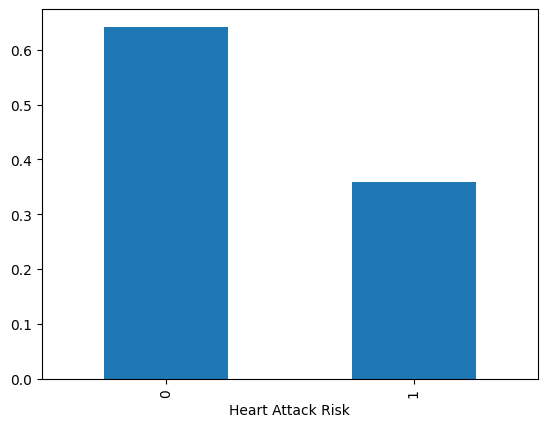

In [13]:
df['Heart Attack Risk'].value_counts(normalize=True).plot(kind='bar')
plt.show()
#checking for a significant imbalance in the target variable where presence of heart attack risk (1: Yes, 0: No)

In [14]:
df.groupby('Sex').mean()
#Male: 0, Female: 1

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
Sex,,,,,,,,,,,,,,,,,,,,,
0,53.988873,260.282769,74.873834,0.653412,0.493700,1.000000,0.502209,0.598756,9.987705,0.989036,...,5.428571,6.000528,158404.357552,28.878872,418.109311,3.478154,7.016528,0.359188,134.970872,85.134348
1,53.060709,258.942685,75.362368,0.649698,0.491327,0.659125,0.499623,0.596531,10.075528,0.999246,...,5.564480,5.977934,157937.871041,28.920420,416.680995,3.516214,7.039593,0.355958,135.317119,85.206259


In [15]:
print(df)

      Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0      67    0          208          72         0               0        1   
1      21    0          389          98         1               1        1   
2      21    1          324          72         1               0        0   
3      84    0          383          73         1               1        1   
4      66    0          318          93         1               1        1   
...   ...  ...          ...         ...       ...             ...      ...   
8758   60    0          121          61         1               1        1   
8759   28    1          120          73         1               0        0   
8760   47    0          250         105         0               1        1   
8761   36    0          178          60         1               0        1   
8762   25    1          356          75         1               1        0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  ..

Histograms for numerical features -> To measure frequency


<Figure size 640x480 with 0 Axes>

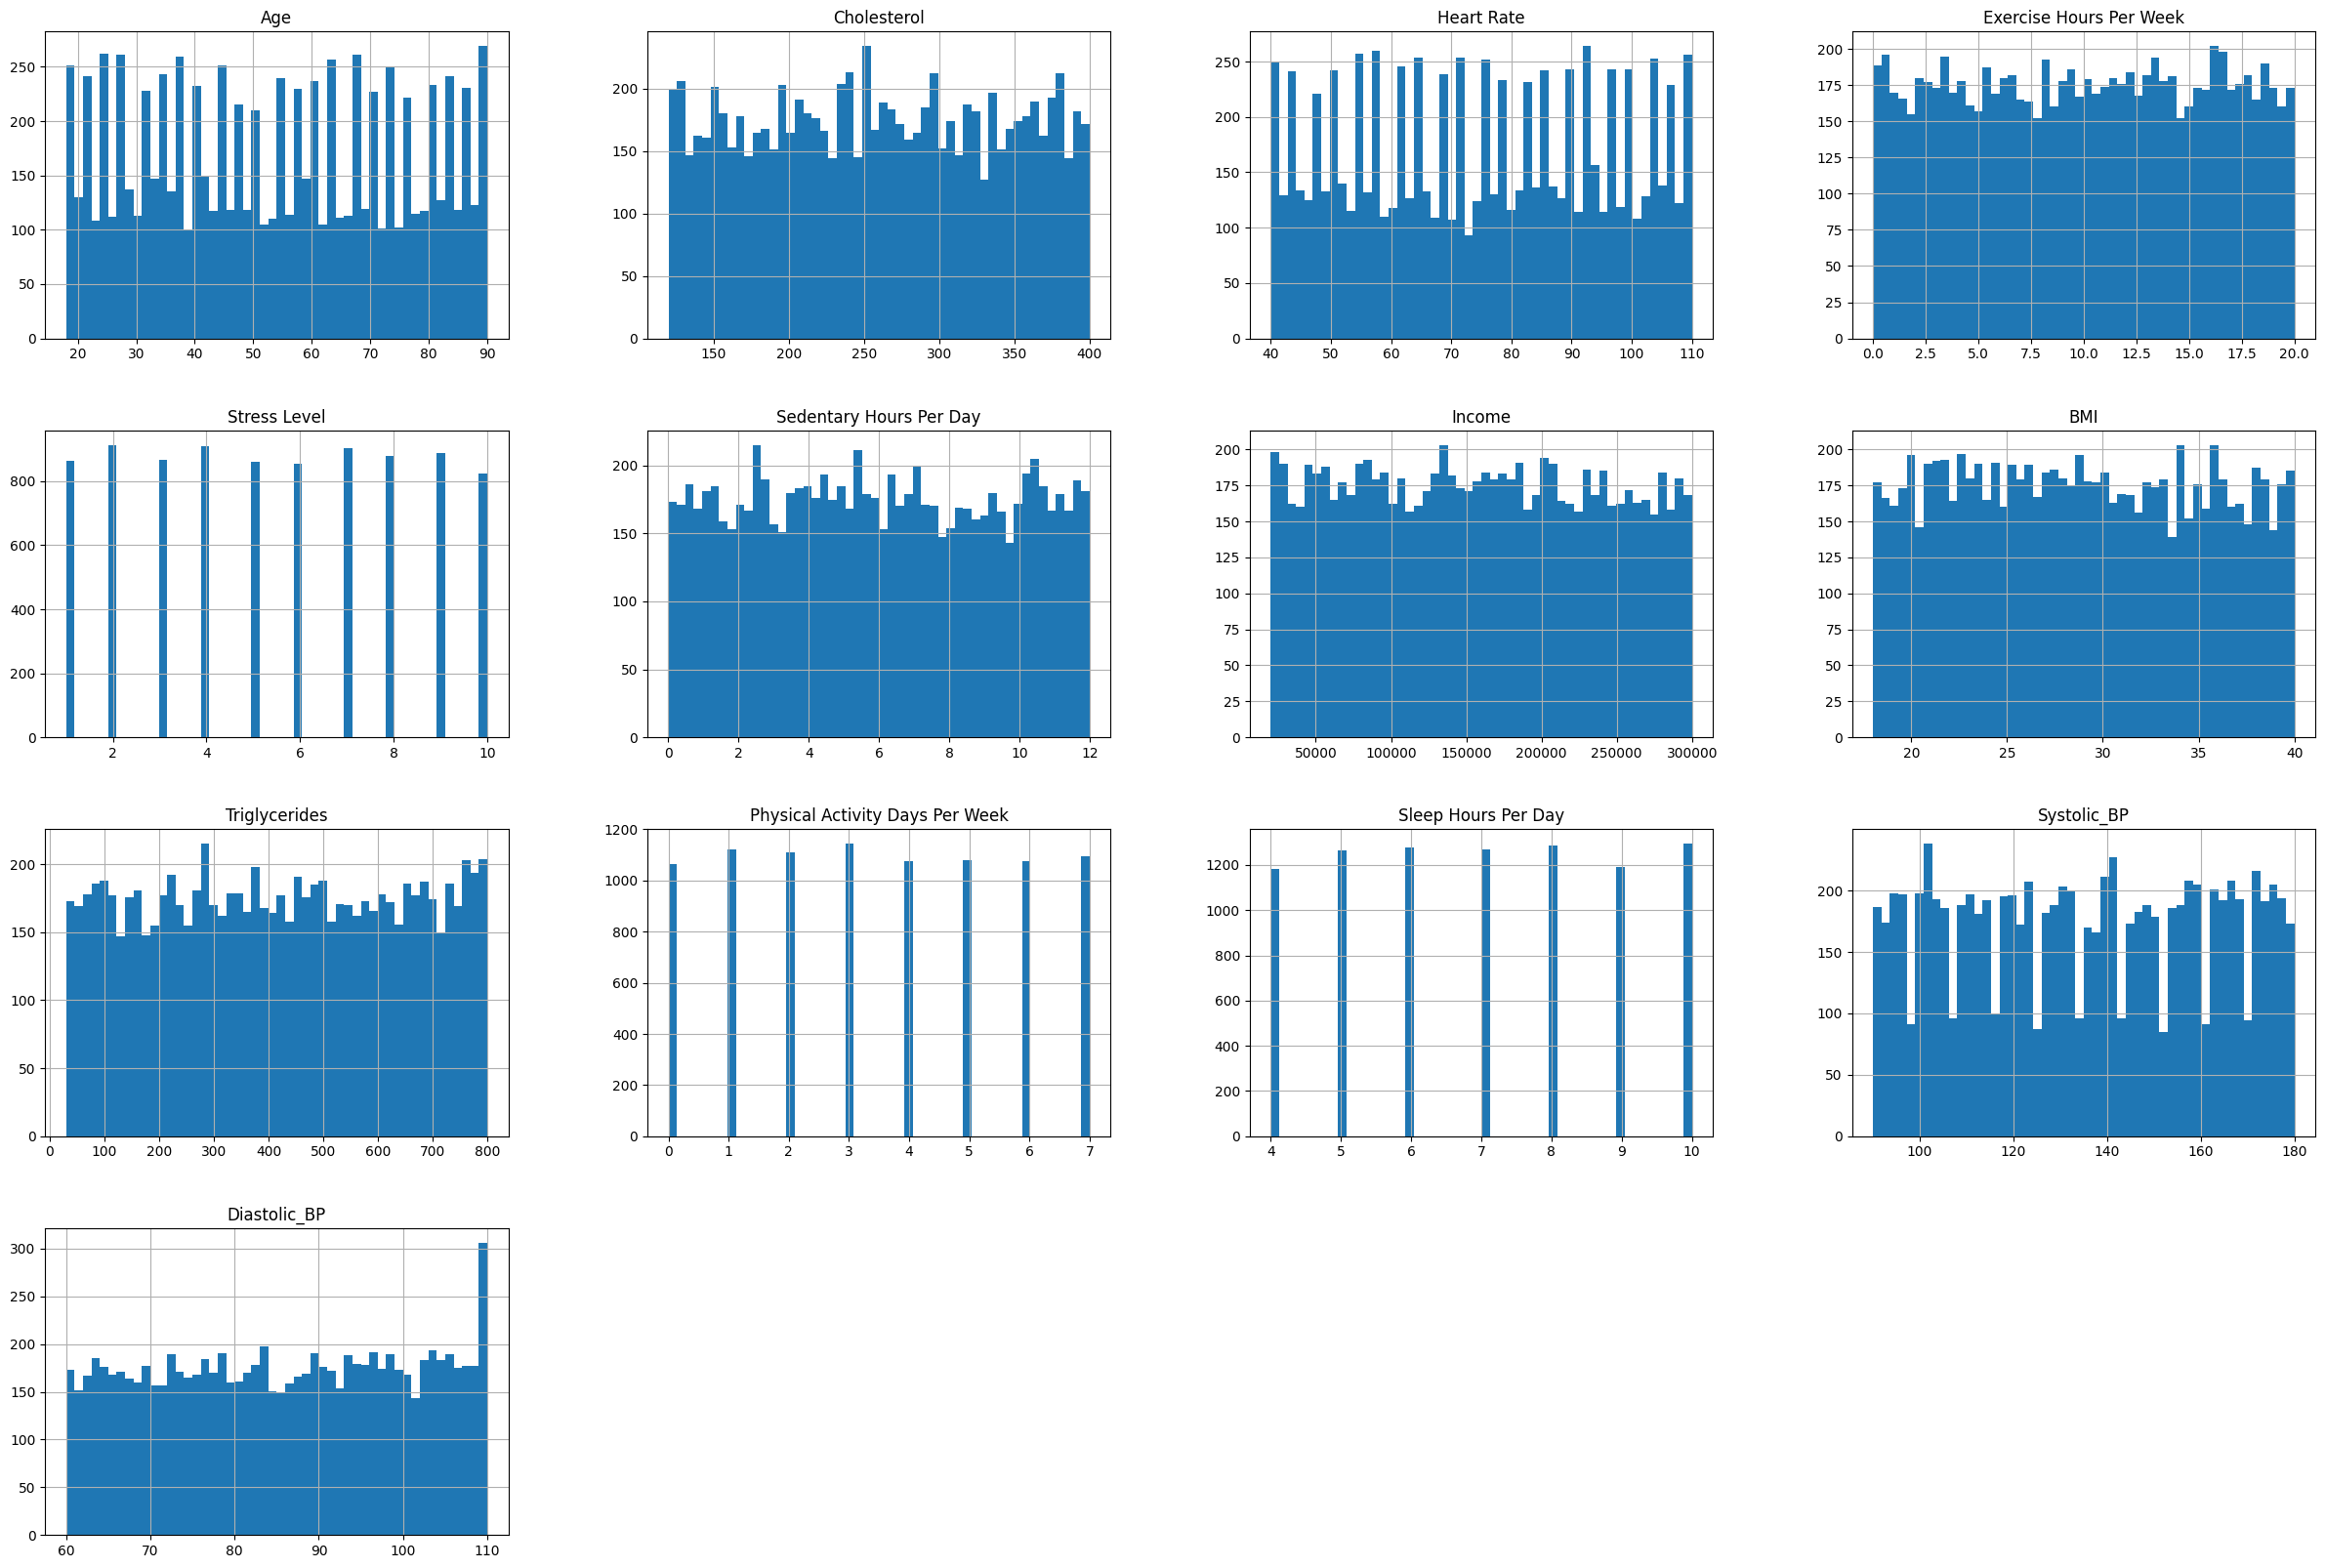

In [16]:
numerical_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
                      'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
                      'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP']

# Create histograms for numerical features
plt.suptitle('Histograms of Numerical Features', fontsize=16)
df[numerical_features].hist(bins=50, figsize=(30, 20))
plt.show()



Box Plots for Numerical Features -> To check for outliers

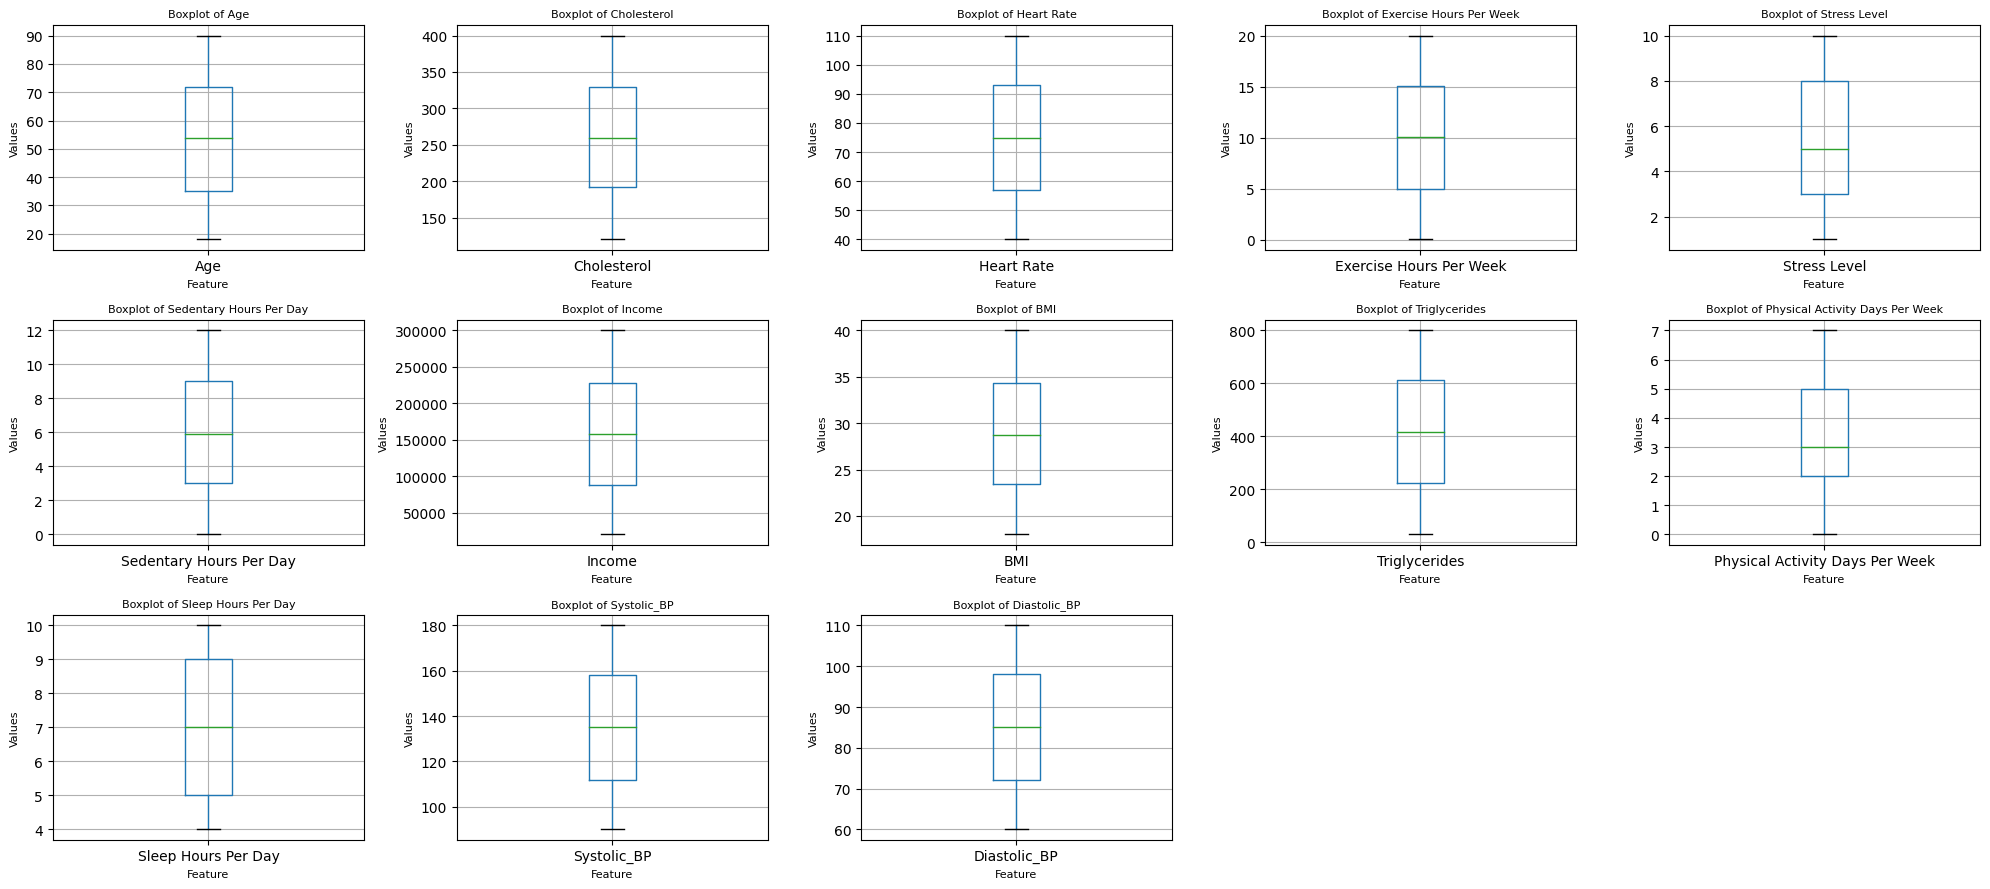

In [17]:
# Create boxplots for numerical features
num_cols = len(numerical_features)
num_rows = (num_cols + 4) // 5  # To ensure 5 boxplots per row
fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 3))

# Remove the extra subplots if the number of features is not divisible by 5
if num_cols % 5 != 0:
    num_empty_subplots = 5 - (num_cols % 5)
    for i in range(num_empty_subplots):
        fig.delaxes(axes[num_rows-1, 4-i])

for i, feature in enumerate(numerical_features):
    row = i // 5
    col = i % 5
    df.boxplot(column=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}', fontsize=8)
    axes[row, col].set_ylabel('Values', fontsize=8)
    axes[row, col].set_xlabel('Feature', fontsize=8)
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()


Scatter Plots for Numerical Features -> Visualizing the relationship between every two numerical features

In [ ]:
sns.pairplot(df[numerical_features], kind='scatter', diag_kind='hist')
plt.show()


Categorical Features -> Pie Charts

In [ ]:
import math

cat_features = ['Sex','Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Heart Attack Risk']

num_features = len(cat_features)
num_cols = 5  # Number of columns in the grid
num_rows = math.ceil(num_features / num_cols)  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, feature in enumerate(cat_features):
    row = i // num_cols
    col = i % num_cols
    if feature == 'Smoking':
       df[feature].replace({1: 'Smoker', 0: 'Non-smoker'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
    elif feature == 'Sex':
      df[feature].replace({1: 'Female', 0: 'Male'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
    elif feature == 'Diet':
      df[feature].replace({2: 'Unhealthy', 1: 'Average', 0: 'Healthy'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
    else: df[feature].replace({1: 'Yes', 0: 'No'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_ylabel('')

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Pair Plot for All Features

In [ ]:
df.info()

In [ ]:
print(df)

**Modelling**

In [ ]:
#splitting the dataset features into X and y variables
X = df.drop(columns=['Heart Attack Risk'])  # Features
y = df['Heart Attack Risk']  # Target variable

In [ ]:
X.info()


In [ ]:
y.shape

Synthetic Minority Oversampling (SMOTE) -> ending the imbalance in the target feature's values

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
os = SMOTE(random_state=0)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os.shape

In [ ]:
y_os.shape

In [ ]:
y_os.value_counts()

In [ ]:
#dataframe with oversampled entries
df_os=pd.DataFrame(X_os)
df_os['Heart Attack Risk'] = y_os

Train & Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.3, random_state=0)

Standardizing the data

In [ ]:
X.describe()

In [ ]:
sc_train = StandardScaler().fit(X_train)
X_train_sc = sc_train.transform(X_train)

In [ ]:
#snapshot of the transformed data
np.set_printoptions(precision=3)
print(X_train_sc[0:5,:])

Training The Model

In [ ]:
model_lr = LogisticRegression(solver='liblinear')

In [ ]:
model_lr.fit(X_train_sc, y_train)

In [ ]:
sc_test=StandardScaler().fit(X_test)
X_test_sc=sc_test.transform(X_test)

In [ ]:
results=model_lr.score(X_test_sc,y_test)
results*100

In [ ]:
c=['red','green','yellow','purple','blue','orange','cyan']
X.info()
X.corrwith(df['Heart Attack Risk']).plot.bar(figsize=(30,10),title='Correlation with target feature',fontsize=15,rot=45,grid=True,color=c)

In [ ]:
print(df)

MODEL ON SECOND DATAFRAME

In [ ]:
df1=df
df1.drop_column['Smoking']
df1.drop_column['Previous Heart Problems']
